In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.listdir("data")

['Introduction to neural networks.pdf',
 'iris.txt',
 'penguins.txt',
 'penguins_lter.csv',
 'penguins_size.csv',
 'seeds.txt',
 'titanic.csv',
 'wine.txt']

In [51]:
df = pd.read_csv(os.path.join("data",'penguins_size.csv'))
features = ['culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g']
df.dropna(subset=features,inplace=True)

In [52]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Y"] = encoder.fit_transform(df["species"])+1
targets = df["Y"].values

In [53]:
df_features = df[features]
first_line = "X = ["
second_line = "Y = ["
for i in range(len(df)):
    
    for j in range(df_features.shape[1]):
        first_line += f" {df_features.iloc[i, j]}"
    if i < len(df)-1:
        first_line += ' ;'
    if i <len(df)-1:
        second_line+= f"{targets[i]}, "
    else:
        second_line+=f"{targets[i]}"
second_line+="]\n"
first_line+="]"
lines = [first_line, second_line]

In [8]:
# with open(os.path.join('data',"penguins.txt"),"w") as f:
#     for line in lines:
#         f.write(line)
#         f.write("\n")

In [3]:
df_titanic = pd.read_csv(os.path.join("data","titanic.csv"))

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [30]:
features = ["Age","Pclass","Sex", "SibSp","Parch", "Fare", "Embarked"]
target = "Survived"
df_data = df_titanic.dropna(subset=features)
X = df_data[features]
Y = df_data[target]

categorical_columns = ["Pclass","Sex","Embarked"]
encoder = LabelEncoder()
for colonne in categorical_columns:
    X.loc[:, colonne] = encoder.fit_transform(X.loc[:, colonne])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

C:\Users\32mor\AppData\Local\Temp\ipykernel_5340\1701587673.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, colonne] = encoder.fit_transform(X.loc[:, colonne])
C:\Users\32mor\AppData\Local\Temp\ipykernel_5340\1701587673.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, colonne] = encoder.fit_transform(X.loc[:, colonne])
C:\Users\32mor\AppData\Local\Temp\ipykernel_5340\1701587673.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [31]:
df_features = X_train
targets = y_train.values
first_line = "X = ["
second_line = "Y = ["
for i in range(len(df_features)):
    
    for j in range(df_features.shape[1]):
        first_line += f" {df_features.iloc[i, j]}"
    if i < len(df_features)-1:
        first_line += ' ;'
    if i <len(df_features)-1:
        second_line+= f"{targets[i]}, "
    else:
        second_line+=f"{targets[i]}"
second_line+="]\n"
first_line+="]"
lines = [first_line, second_line]

In [32]:
with open(os.path.join('data',"titanic.txt"),"w") as f:
    for line in lines:
        f.write(line)
        f.write("\n")

In [33]:
X_train

,Age,Pclass,Sex,SibSp,Parch,Fare,Embarked
509,26.0,2,1,0,0,56.4958,2
691,4.0,2,0,0,1,13.4167,0
51,21.0,2,1,0,0,7.8000,2
288,42.0,1,1,0,0,13.0000,2
744,31.0,2,1,0,0,7.9250,2
...,...,...,...,...,...,...,...
395,22.0,2,1,0,0,7.7958,2
103,33.0,2,1,0,0,8.6542,2
105,28.0,2,1,0,0,7.8958,2
705,39.0,1,1,0,0,26.0000,2


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
results_nocluster = pd.read_csv("final_results_univariate_no_cluster.csv")
results_simplemerge = pd.read_csv("final_results_univariate_simplemerge.csv")

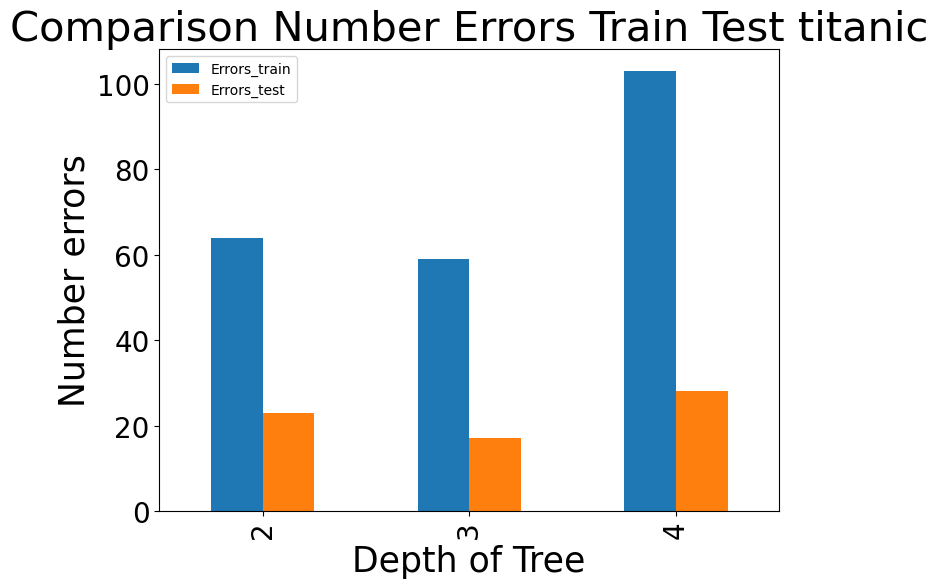

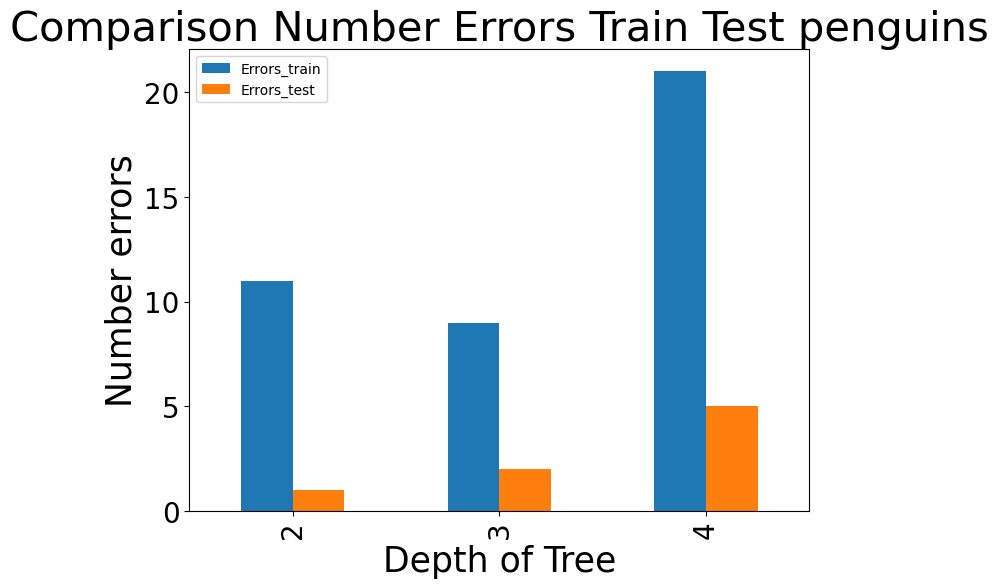

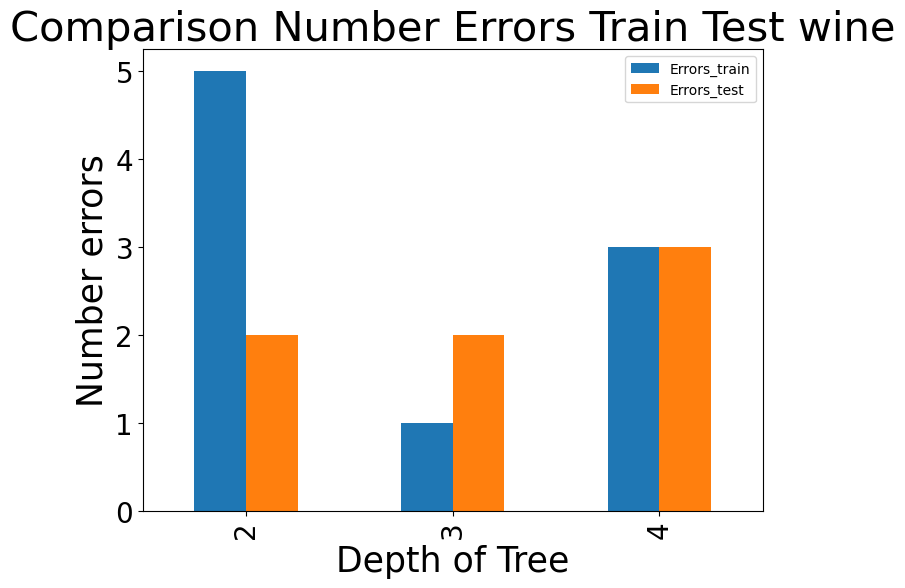

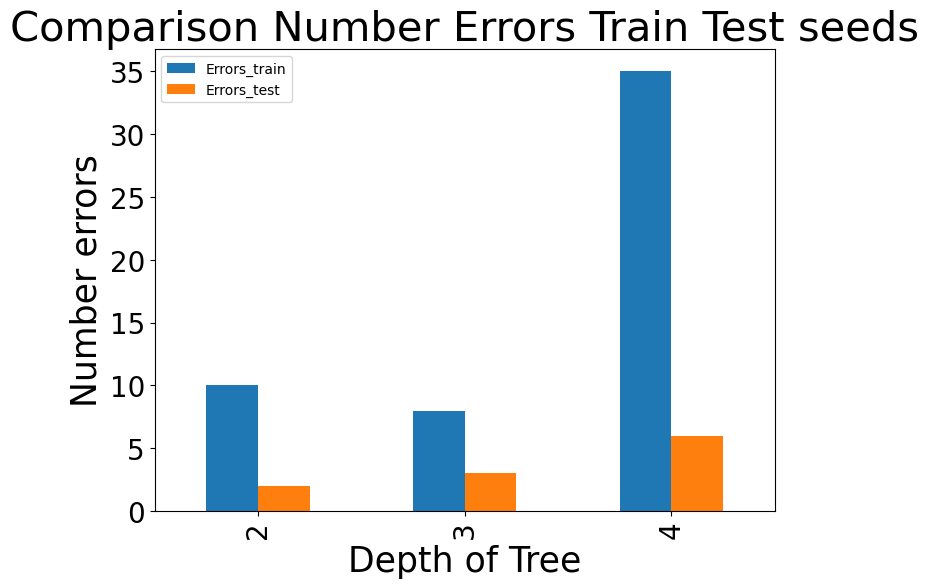

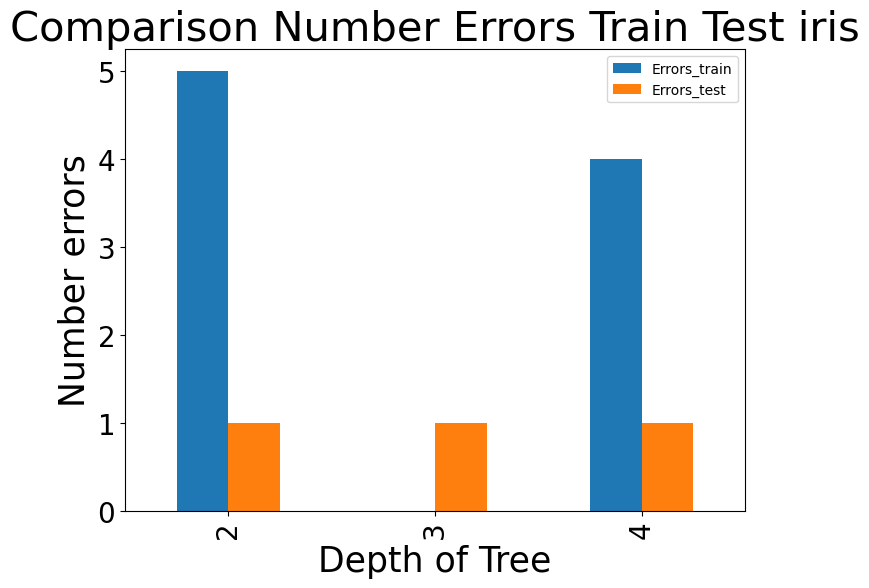

In [52]:

datasets = ["titanic","penguins","wine","seeds","iris"]
for dataset in datasets:
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    results_nocluster.loc[results_nocluster["dataset_name"]==dataset].set_index("D").iloc[:,1:3].plot(kind="bar",ax=ax)
    ax.set_xlabel('Depth of Tree', fontdict={"fontsize":25})
    ax.set_ylabel('Number errors',fontdict={"fontsize":25})
    ax.set_title(f'Comparison Number Errors Train Test {dataset}',fontdict={"fontsize":30})
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    plt.savefig(f"main_function_{dataset}")

In [53]:
df_runtime = results_simplemerge.pivot_table(index="dataset_name", columns="D", values="Resolution_time", aggfunc=np.mean).reset_index()
df_runtime.columns = ['dataset_name', "Depth_2", "Depth_3","Depth_4"]
# df_runtime.to_csv("runtime_noclusters.csv", index=False)

In [54]:
df_runtime

,dataset_name,Depth_2,Depth_3,Depth_4
0,iris,0.900000,2.133333,5.583333
1,penguins,3.983333,7.816667,8.450000
2,seeds,3.883333,7.383333,8.133333
3,titanic,2.116667,4.983333,6.533333
4,wine,3.000000,6.600000,7.666667


In [111]:
results_convexhull = pd.read_csv("final_results_univariate_convexhull.csv")
results_kmeans = pd.read_csv("final_results_univariate_kmeans.csv")

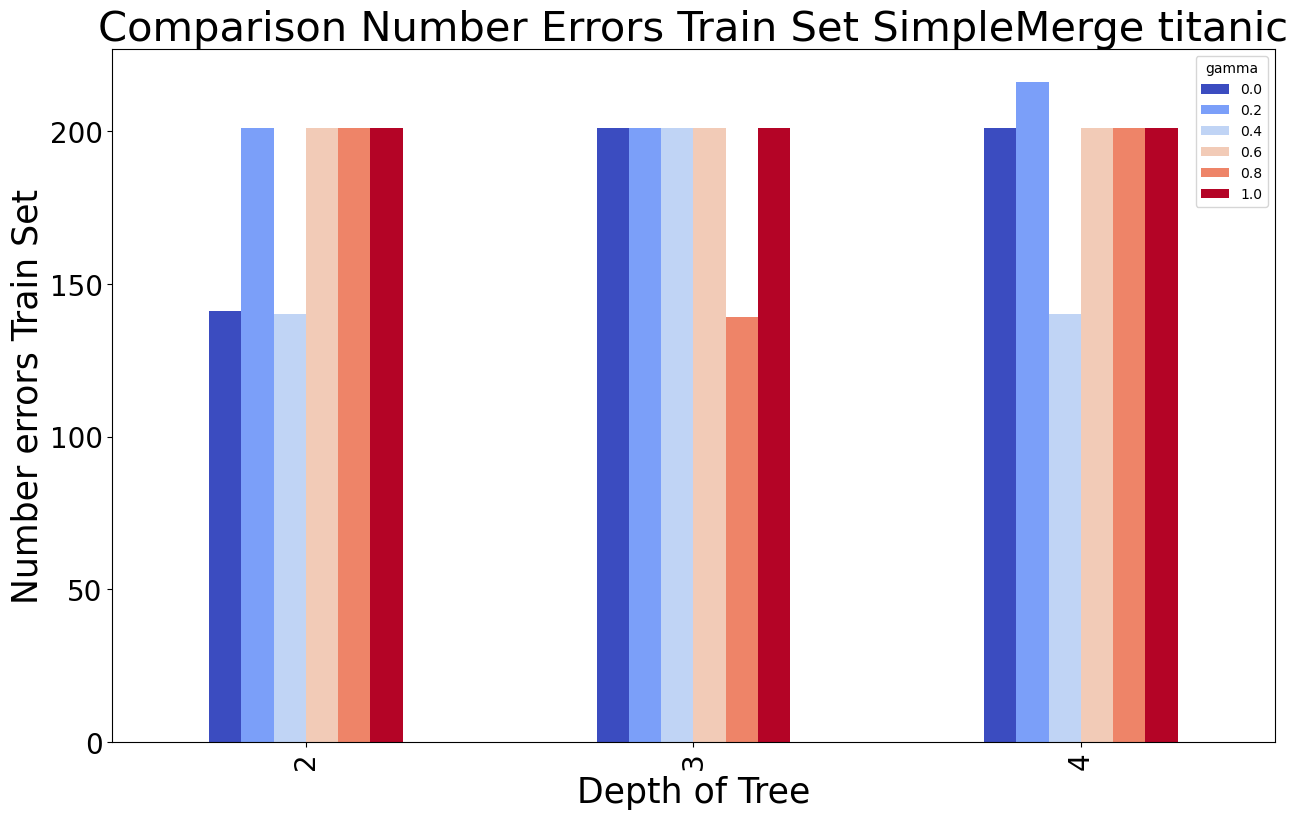

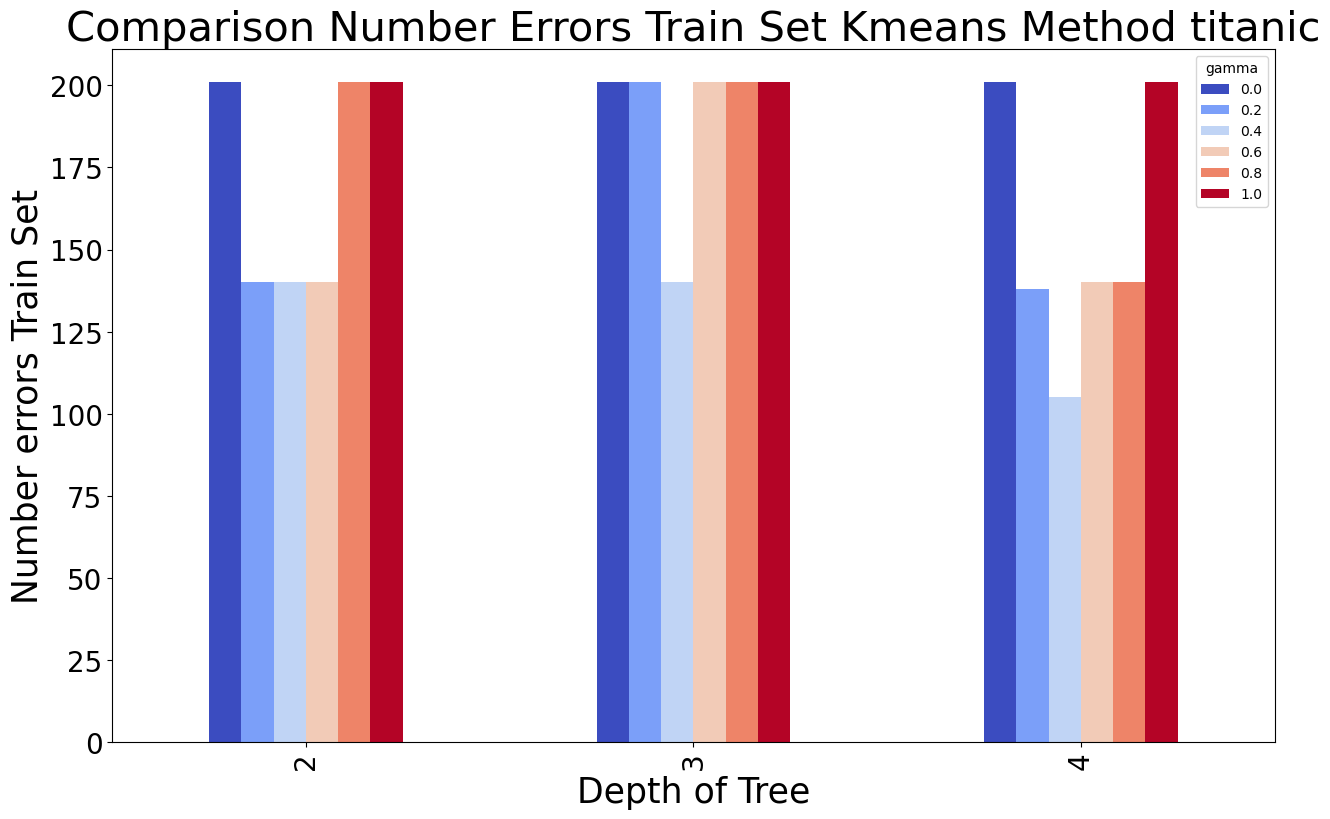

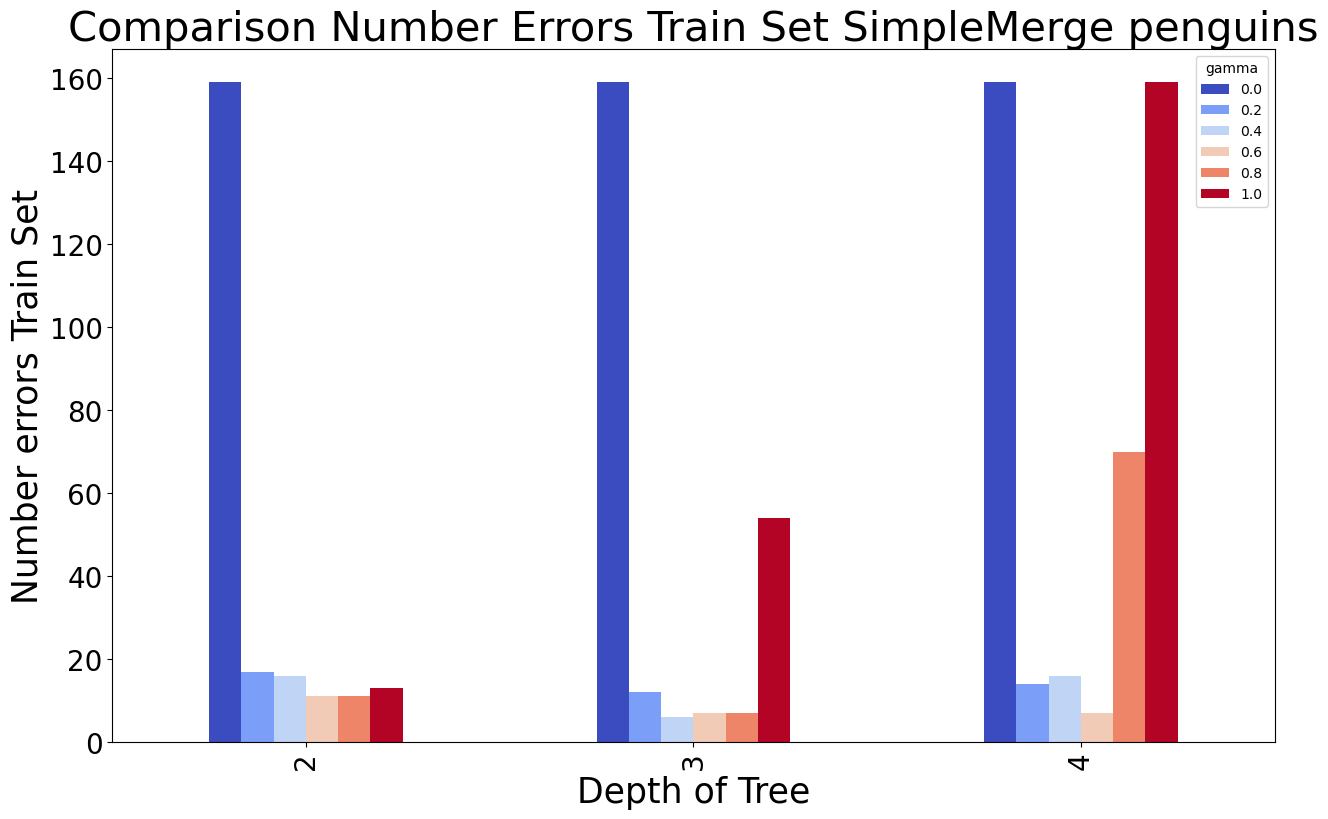

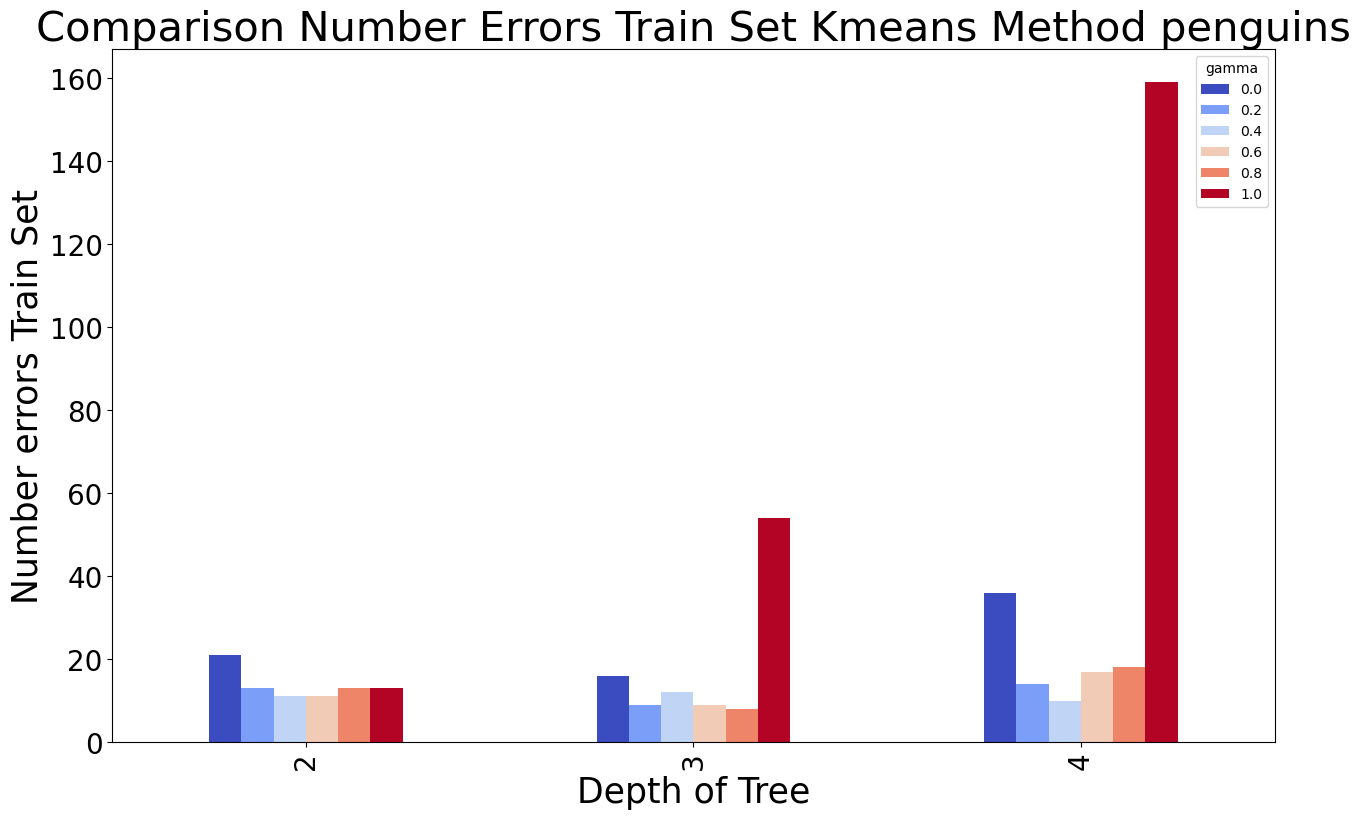

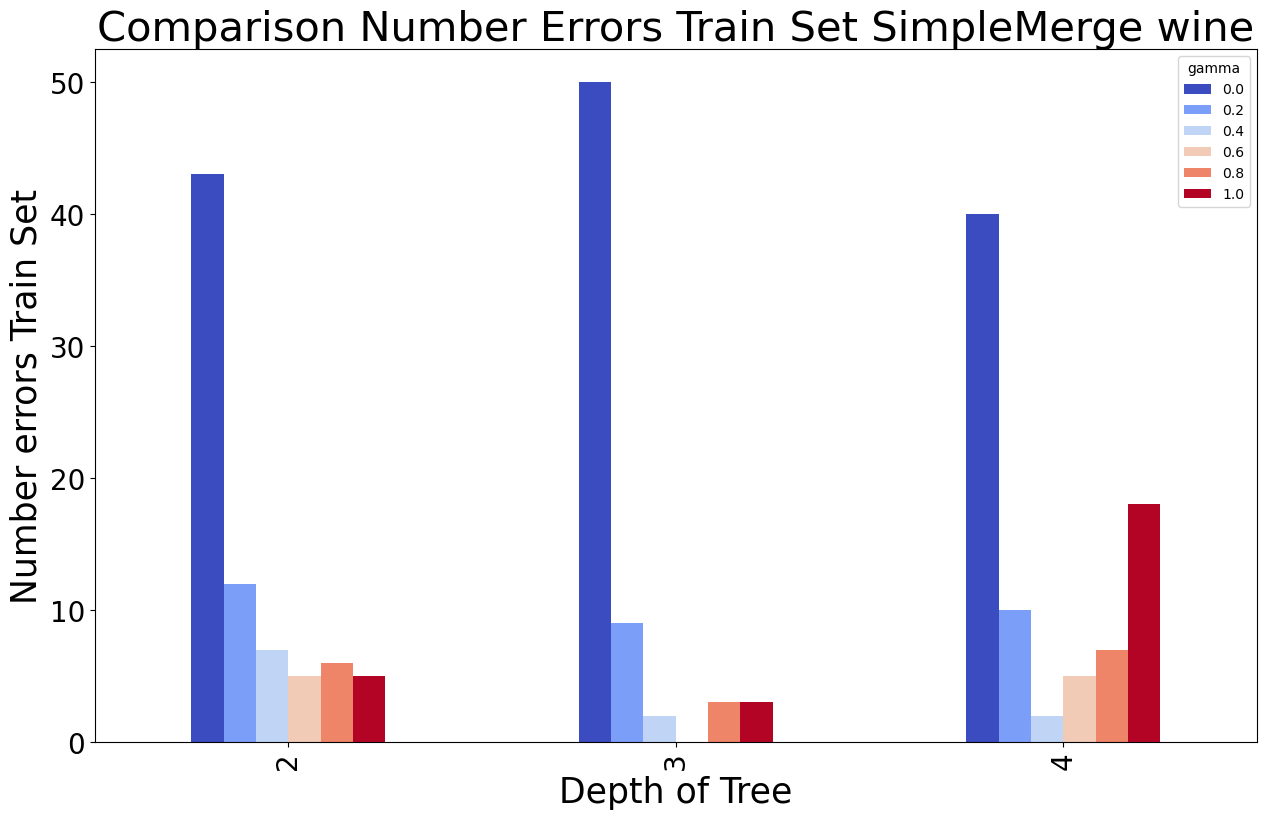

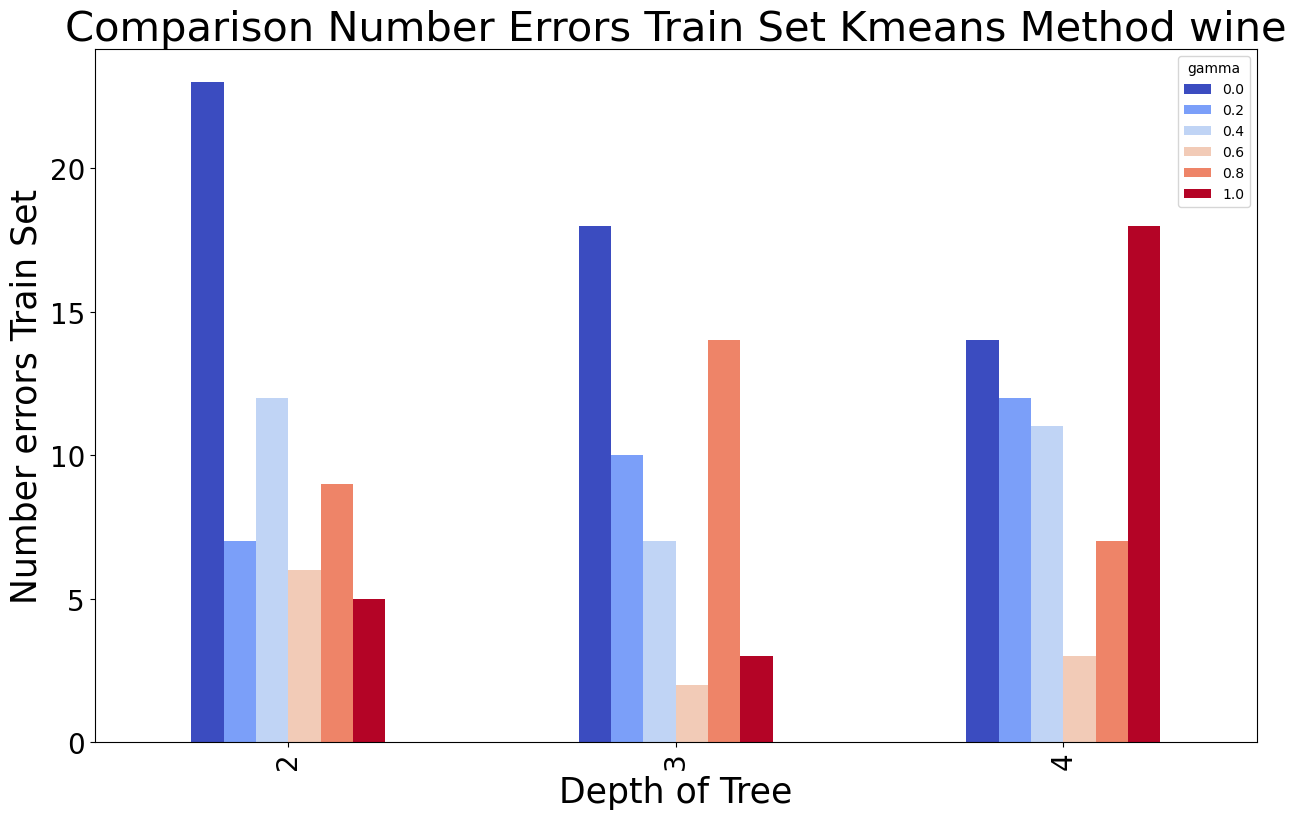

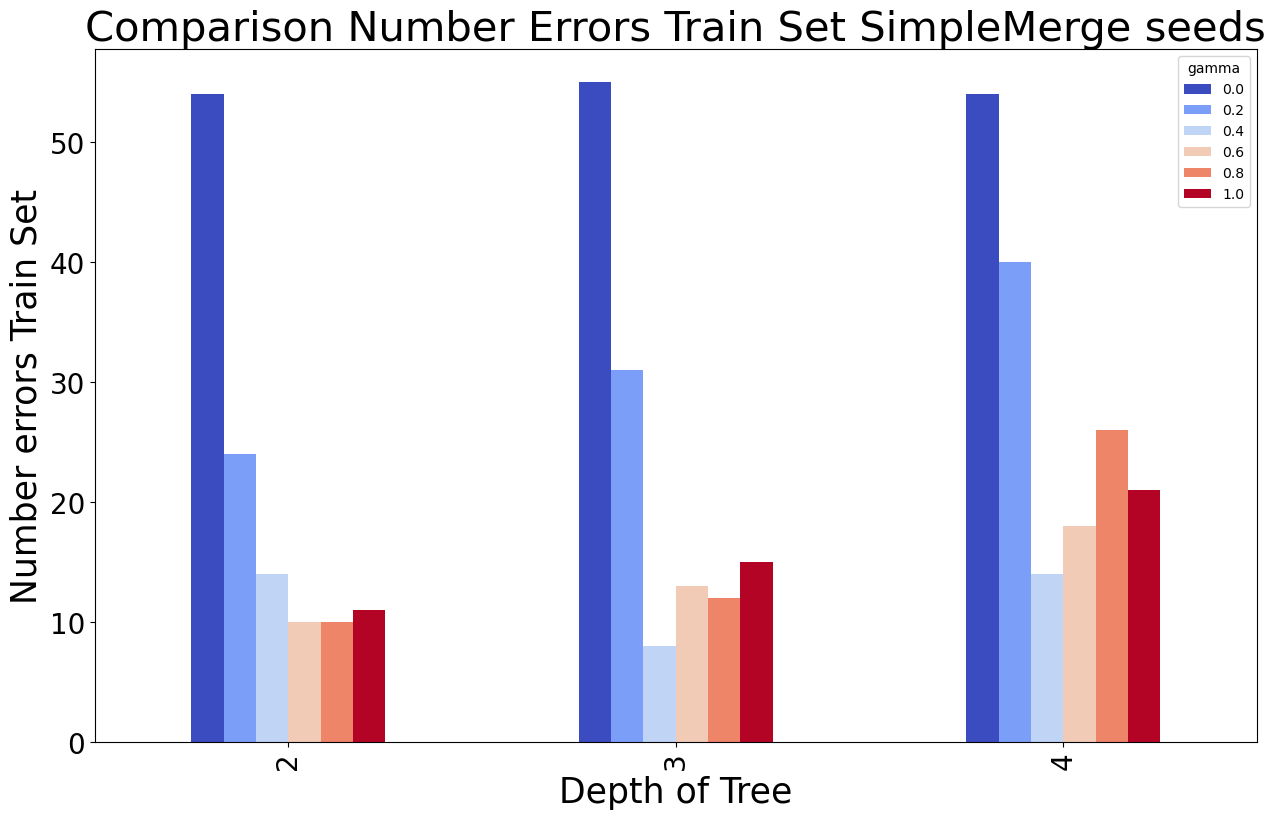

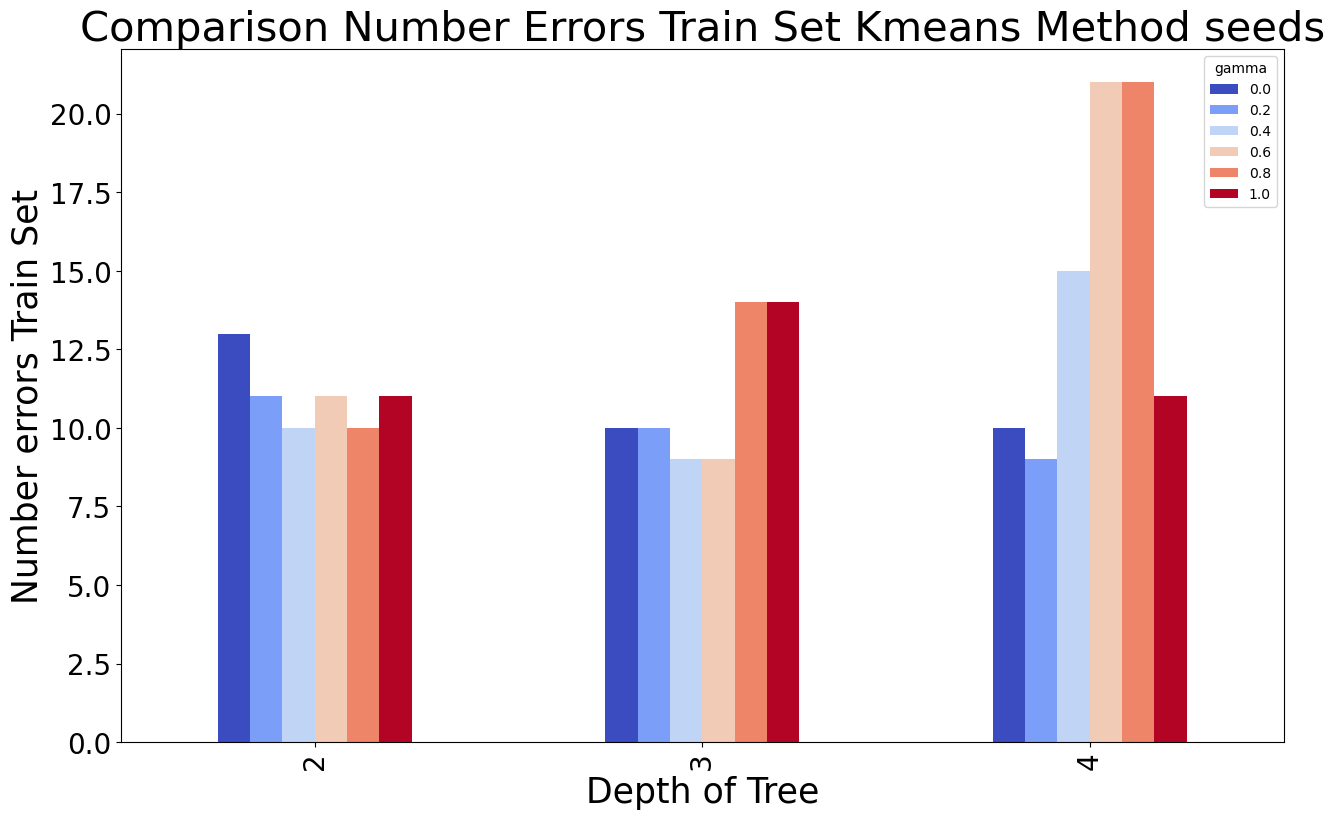

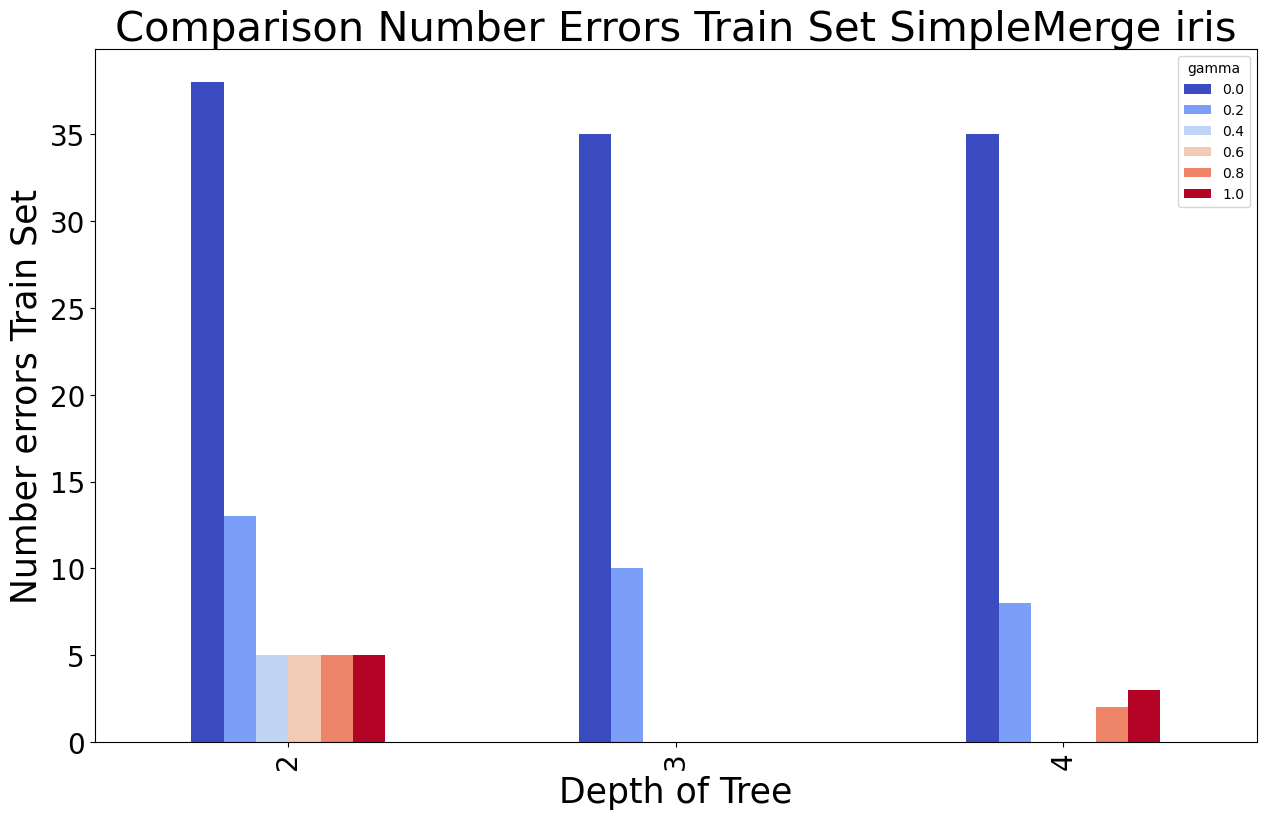

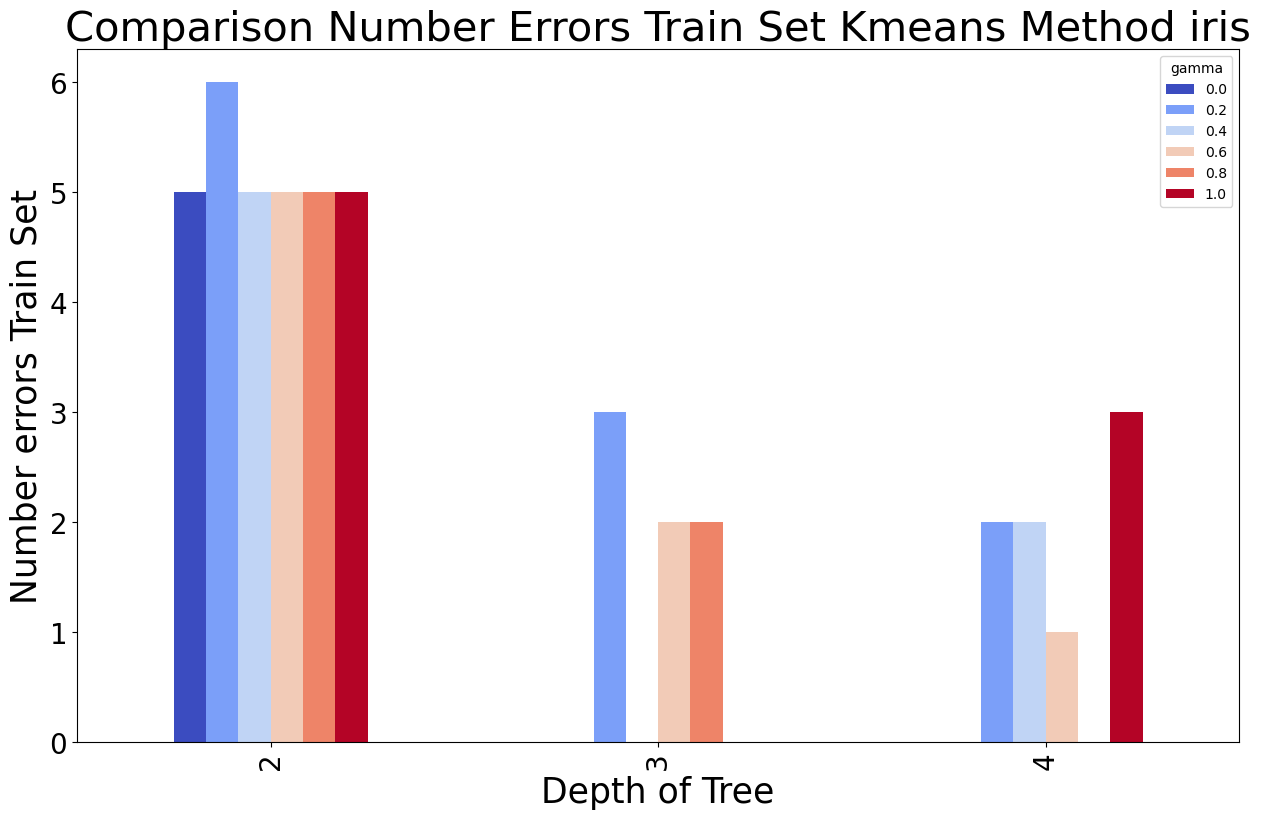

In [36]:
datasets = ["titanic","penguins","wine","seeds","iris"]
for dataset in datasets:
    fig, ax = plt.subplots(1,1, figsize=(15,9))
    results_convexhull[results_convexhull["dataset_name"]==dataset].pivot_table(index='D', columns="gamma", values="Errors_train").plot(kind="bar", ax = ax, colormap="coolwarm")
    ax.set_xlabel('Depth of Tree', fontdict={"fontsize":25})
    ax.set_ylabel('Number errors Train Set',fontdict={"fontsize":25})
    ax.set_title(f'Comparison Number Errors Train Set SimpleMerge {dataset}',fontdict={"fontsize":30})
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    plt.savefig(f"convex_hull_method_dataset_{dataset}")

    fig, ax = plt.subplots(1,1, figsize=(15,9))
    results_kmeans[results_kmeans["dataset_name"]==dataset].pivot_table(index='D', columns="gamma", values="Errors_train").plot(kind="bar", ax = ax, colormap="coolwarm")
    ax.set_xlabel('Depth of Tree', fontdict={"fontsize":25})
    ax.set_ylabel('Number errors Train Set',fontdict={"fontsize":25})
    ax.set_title(f'Comparison Number Errors Train Set Kmeans Method {dataset}',fontdict={"fontsize":30})
    # ax.set_xticks(fontsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    plt.savefig(f"kmeans_method_dataset_{dataset}")

In [112]:
results_simplemerge[(results_simplemerge["dataset_name"]=="wine")].pivot_table(index="D", columns="gamma", values="Errors_train")

gamma,0.0,0.2,0.4,0.6,0.8,1.0
D,,,,,,
2,56,10,7,5,6,5
3,56,0,2,0,3,3
4,56,5,2,5,7,18


In [113]:
results_convexhull[(results_convexhull["dataset_name"]=="wine")].pivot_table(index="D", columns="gamma", values="Errors_train")

gamma,0.0,0.2,0.4,0.6,0.8,1.0
D,,,,,,
2,43,12,7,5,6,5
3,50,9,2,0,3,3
4,40,10,2,5,7,54


In [114]:
results_simplemerge.groupby("gamma")["Errors_train"].mean()

gamma
0.0    87.800000
0.2    22.133333
0.4    21.933333
0.6    37.666667
0.8    36.666667
1.0    59.866667
Name: Errors_train, dtype: float64

In [115]:
results_convexhull.groupby("gamma")["Errors_train"].mean()

gamma
0.0    94.933333
0.2    53.266667
0.4    37.400000
0.6    45.533333
0.8    47.666667
1.0    59.866667
Name: Errors_train, dtype: float64

In [116]:
results_kmeans.groupby("gamma")["Errors_train"].mean()

gamma
0.0    39.333333
0.2    26.066667
0.4    38.533333
0.6    39.466667
0.8    49.000000
1.0    58.066667
Name: Errors_train, dtype: float64

In [76]:
datasets

['titanic', 'penguins', 'wine', 'seeds', 'iris']

In [94]:
number_values = []
for dataset in datasets:
    with open(os.path.join('data',f"{dataset}.txt"),"r") as f:
        print(dataset)
        if dataset == "iris":
            lines = f.readlines()
            number_elements = len(lines[-1].replace('[',"").replace(']',"").split(', '))
            number_train = int(0.8*number_elements)
            number_values.append(number_train)
        else:
            lines = f.readlines()
            number_elements = len(lines[1].split(" = ")[1].replace('[',"").replace(']',"").split(', '))
            number_train = int(0.8*number_elements)
            number_values.append(number_train)
        

titanic
penguins
wine
seeds
iris


In [124]:
df_table_simple = results_simplemerge.pivot_table(index="dataset_name",columns="gamma", values="Errors_train", aggfunc=np.mean)
df_table_simple.loc[datasets].divide(np.array(number_values), axis=0).mean(axis=0).mean()

0.170743645689125

In [123]:
df_table_kmeans = results_kmeans.pivot_table(index="dataset_name",columns="gamma", values="Errors_train", aggfunc=np.mean)
df_table_kmeans.loc[datasets].divide(np.array(number_values), axis=0).mean(axis=0).mean()

0.15043795805722202

In [122]:
df_table_convexhull = results_convexhull.pivot_table(index="dataset_name",columns="gamma", values="Errors_train", aggfunc=np.mean)
df_table_convexhull.loc[datasets].divide(np.array(number_values), axis=0).mean(axis=0)

0.20816501602962303

In [121]:
df_table_convexhull.loc[datasets].divide(np.array(number_values), axis=0).mean().mean()

0.20816501602962303